In [1]:
import numpy as np
import matplotlib.pyplot as plt

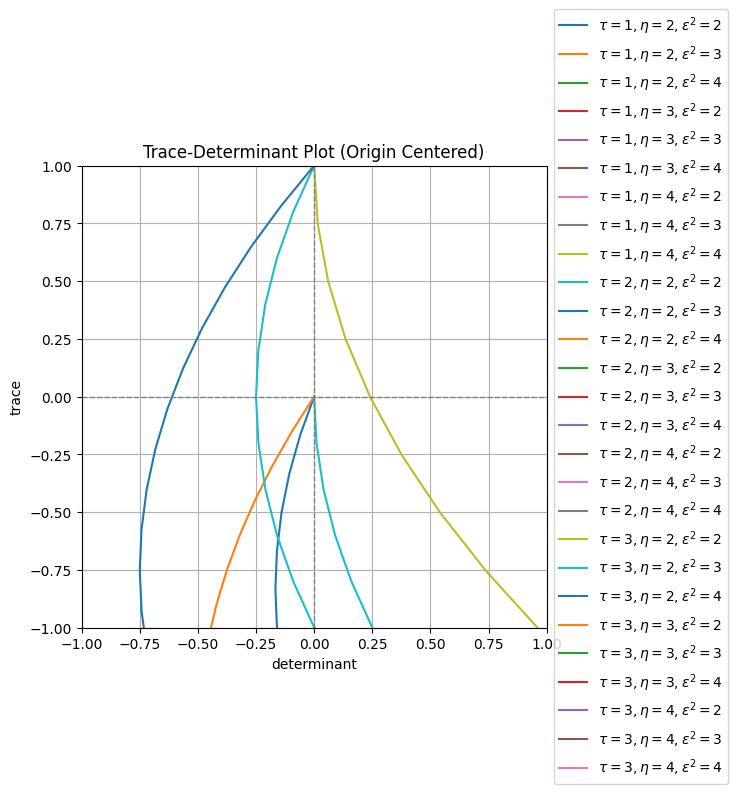

In [2]:
def plot_trace_determinant(tao=1, eta=2, epsilon2=1, q2_max=50, num_points=500):
    assert eta >= 2, "eta 必须满足 eta >= 2 才能保证 Be_neg 为实数"
    
    Be_neg = (eta + np.sqrt(eta * eta - 4)) / 2
    # print(f"eta = {eta}, Be_neg = {Be_neg:.4f}")

    q2 = np.linspace(0, q2_max, num_points)

    tr = tao - eta * Be_neg - q2 * (tao / epsilon2 + 1)
    det = (
        q2**2 * tao / epsilon2
        + q2 * (tao * eta * Be_neg / epsilon2 - tao)
        + tao * (eta * Be_neg - 2)
    )

    label = fr"$\tau={tao},\eta={eta},\epsilon^2={epsilon2}$"
    plt.plot(det, tr, label=label)

# 绘图部分
plt.figure(figsize=(6, 6))

for tau_val in [1, 2, 3]:
    for eta_val in [2, 3, 4]:
        for epsilon2_val in [2, 3, 4]:
            plot_trace_determinant(tao=tau_val, eta=eta_val, epsilon2=epsilon2_val)

plt.xlabel("determinant")
plt.ylabel("trace")
plt.title("Trace-Determinant Plot (Origin Centered)")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(True)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

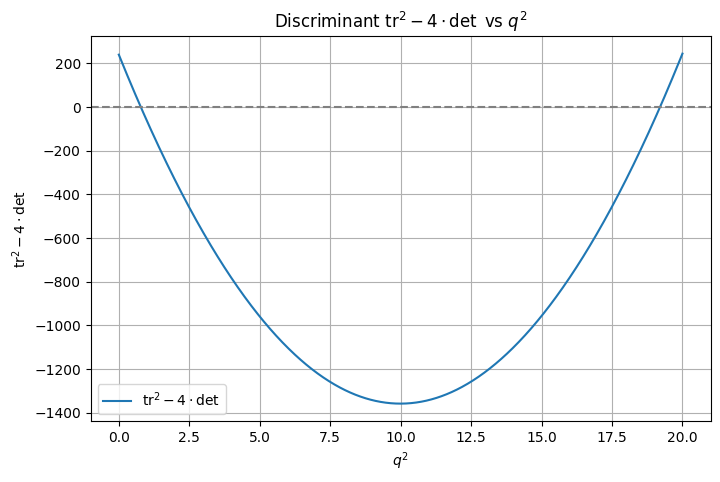

In [3]:
def tr_squared_minus_4det(q2, tao=1, eta=2, epsilon2=1):
    assert eta >= 2, "eta 必须满足 eta >= 2 才能保证 Be_neg 为实数"
    
    Be_neg = (eta + np.sqrt(eta * eta - 4)) / 2
    # print(f"eta = {eta}, Be_neg = {Be_neg:.4f}")

    tr = tao - eta * Be_neg - q2 * (tao / epsilon2 + 1)
    det = (
        q2**2 * tao / epsilon2
        + q2 * (tao * eta * Be_neg / epsilon2 - tao)
        + tao * (eta * Be_neg - 2)
    )

    return tr*tr - 4 * det

q2_vals = np.linspace(0, 20, 1000)
y_vals = tr_squared_minus_4det(q2_vals, tao=5, eta=6, epsilon2=1)

plt.figure(figsize=(8, 5))
plt.plot(q2_vals, y_vals, label=r"$\mathrm{tr}^2 - 4\cdot \det$")
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel(r"$q^2$")
plt.ylabel(r"$\mathrm{tr}^2 - 4\cdot \det$")
plt.title(r"Discriminant $\mathrm{tr}^2 - 4\cdot \det$ vs $q^2$")
plt.grid(True)
plt.legend()
plt.show()